<a href="https://colab.research.google.com/github/muchlisam17/Machine-Learning-Task-TelU/blob/main/W6/1.%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn 

from sklearn.datasets import make_blobs

K-Means Algorithm

In [2]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Incorrect Number of Blobs')

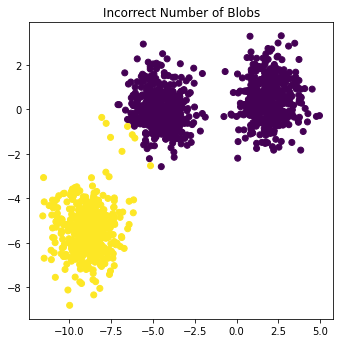

In [3]:
plt.figure(figsize=(12, 12))

n_samples = 1200
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state= random_state)
#incorrect numbers of clustering
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('Incorrect Number of Blobs')

Text(0.5, 1.0, 'Annisotropicly Distributed data')

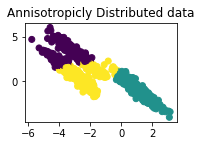

In [4]:
#Annisotropicly distributed data
transform = [[0.6083, -0.633], [-0.4088, 0.852]]
X_aniso = np.dot(X, transform)
y_pred = KMeans(n_clusters= 3, random_state=random_state).fit_predict(X_aniso)
plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title('Annisotropicly Distributed data')



Text(0.5, 1.0, 'Unequal Variance')

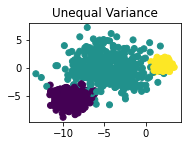

In [5]:
#difference variance
X_varied, y_varied = make_blobs(
    n_samples= n_samples, cluster_std = [1.0, 2.5, 0.5], random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
plt.title('Unequal Variance')


Text(0.5, 1.0, 'Unevenly size blop')

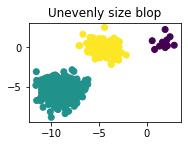

In [6]:
#Unevenly size blob
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2 ][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)
plt.subplot(224)
plt.scatter(X_filtered[:,0], X_filtered[:, 1], c=y_pred)
plt.title('Unevenly size blop')


Pros using K-Means:
1. K-means is a fast method because it does not have many computations.

CONS:
1. Identifying and classifying the groups can be a challenging aspect.

2. As it starts with a random choice of cluster centers, therefore, the results can lack consistency.

 Mean Shift Algorithm

In [7]:
from sklearn.cluster import MeanShift, estimate_bandwidth
#generate sample data

centers = [ [1, 1], [-1, -1], [1, -1] ]
X, _ = make_blobs(n_samples=10000, centers = centers, cluster_std = 0.6)

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=5000)

ms= MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print('number of estimated cluster: %d'%n_clusters_)

number of estimated cluster: 3


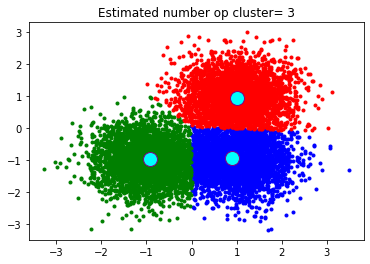

In [8]:
from itertools import cycle
#"""""
plt.figure(1)
plt.clf()

color = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), color):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor='cyan',
        markeredgecolor="purple",
        markersize=14,
    )
plt.title('Estimated number op cluster= %d' % n_clusters_)
plt.show()

Pros of using Mean Shift:
1. Unlike the K-means clustering algorithm, you need not select the number of clusters.
2. The cluster centers converging towards the point of maximum density is a desirable aspect as it fits well in the data-driven sense.

CONS:
1. The selection of the window size or the radius t is a non-trivial issue.

Clustering using DBSCAN

In [9]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

esitmated number of clusters: 3
estimated number of noise points: 18
homogenity: 0.947
completeness: 0.877
V-measures: 0.911
Adjusted Rand index: 0.948
Adjusted mutual information::0.910
Silhouette coefficient: 0.610


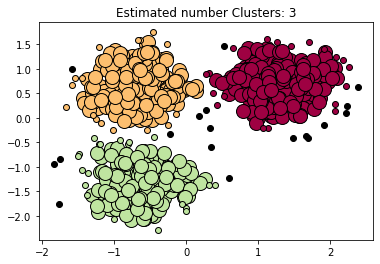

In [10]:


centers = [[1, 1], [-1, 1], [-1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)
X = StandardScaler().fit_transform(X)

#Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

#number of clusters in label, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('esitmated number of clusters: %d' % n_clusters_)
print('estimated number of noise points: %d' % n_noise_)
print('homogenity: %0.3f'% metrics.homogeneity_score(labels_true, labels))
print('completeness: %0.3f'% metrics.completeness_score(labels_true, labels))
print('V-measures: %0.3f'% metrics.v_measure_score(labels_true, labels))
print('Adjusted Rand index: %0.3f'% metrics.adjusted_rand_score(labels_true, labels))
print(
    'Adjusted mutual information::%0.3f'
    %metrics.adjusted_mutual_info_score(labels_true, labels)
)
print('Silhouette coefficient: %0.3f'% metrics.silhouette_score(X, labels))

#plotting
unique_labels = set(labels)
color = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, color):
    if k == -1:
        #black use for noises
        col = [0, 0, 0, 1]\

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        'o',
        markerfacecolor = tuple(col),
        markeredgecolor = 'k',
        markersize = 14,
    )
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        'o',
        markerfacecolor = tuple(col),
        markeredgecolor = 'k',
        markersize = 6,
    )
plt.title('Estimated number Clusters: %d'% n_clusters_)
plt.show()

Pros using DBSCAN as clustering method:
1. The DBSCAN is better than other cluster algorithms because it does not require a pre-set number of clusters.
2. It identifies outliers as noise, unlike the Mean-Shift method that forces such points into the cluster in spite of having different characteristics.
3. It finds arbitrarily shaped and sized clusters quite well.

CONS:
1. It is not very effective when you have clusters of varying densities. There is a variance in the setting of the distance threshold Ɛ and the minimum points for identifying the neighborhood when there is a change in the density levels.
2. If you have high dimensional data, the determining of the distance threshold Ɛ becomes a challenging task.

AGGLOMERATIVE CLUSTERINGG ALGORITHM

In [11]:
import time
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

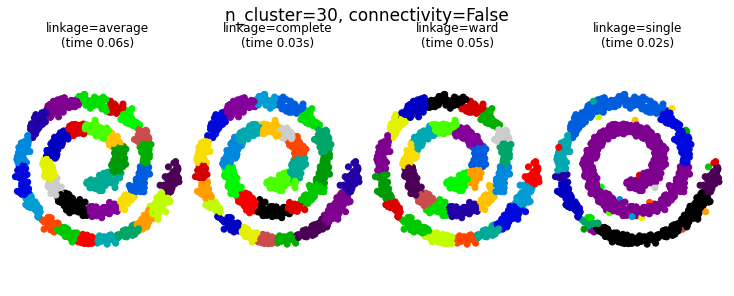

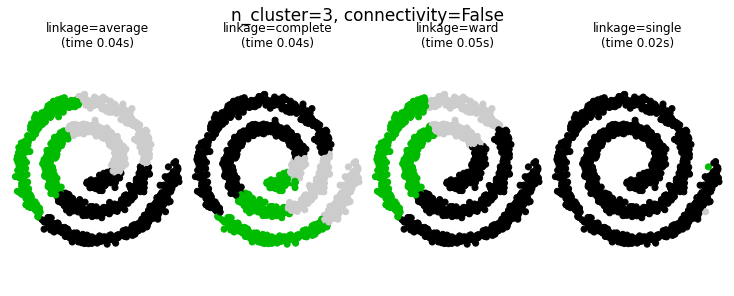

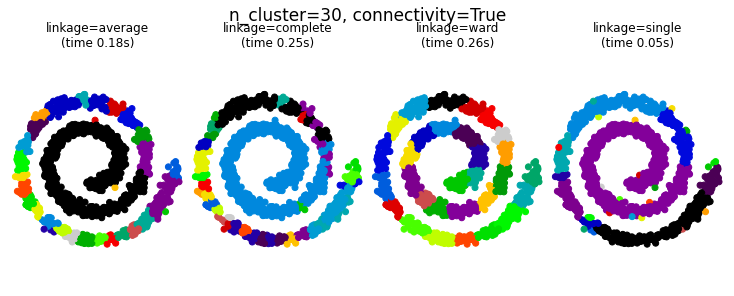

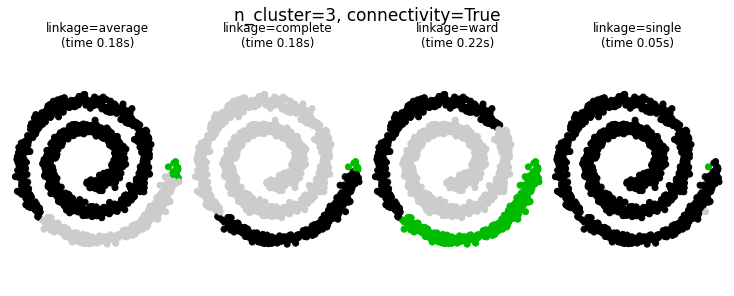

In [12]:
#generate sample data
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)

X = np.concatenate((x, y))
X += 0.7 * np.random.randn(2, n_samples)
X = X.T

#creating graph
knn_graph = kneighbors_graph(X, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(("average", "complete", "ward", "single")):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(
                linkage=linkage, connectivity=connectivity, n_clusters=n_clusters
            )
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
            plt.title(
                'linkage=%s\n(time %.2fs)' % (linkage, elapsed_time),
                fontdict=dict(verticalalignment='top'),
            )
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
            plt.suptitle(
                    'n_cluster=%i, connectivity=%r'
                    %(n_clusters, connectivity is not None),
                    size = 17,
                    )
plt.show()



Pros using Agglomerative Clustering
1. There is no need to specify the number of clusters. You have the option of choosing the best-looking clusters.
2. This algorithm is not sensitive to the choice of distance metric.